<a href="https://colab.research.google.com/github/jbpost2/ST-554-Big-Data-With-Python-Course-Notes/blob/main/HW2File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2 Solutions

## Part 1 - List and `numpy` practice

For this part, import the `numpy` library and the *new* way to do random number generation using `numpy` given [here](https://numpy.org/doc/stable/reference/random/index.html#random-quick-start).

Generate 30 values from a Poisson distribution with $\lambda = 3$ and print those out.  Note: each time you run your code you'll get different values unless you set a seed.

In [ ]:
import numpy as np
from numpy.random import default_rng
rng = default_rng(seed = 1)

vals = rng.poisson(lam = 3, size = 30)
print(vals)

[4 4 4 2 2 6 3 4 2 5 3 4 4 1 4 4 3 7 2 2 2 0 2 4 5 3 3 3 5 1]


Use `numpy`'s mean function to find the mean of your 30 values above.

In [ ]:
np.mean(vals)

3.2666666666666666

Use a list comprehension to generate 5000 data sets from the Poisson with mean 3 and return the mean (within the list comprehension - no need to return the values themselves).  

If it helps, write this via a for loop first and then translate it to a list comprehension!

In [ ]:
#for loop just to show that way of doing this
list_for_means = []
for _ in range(0, 5000):
    list_for_means.append(np.mean(rng.poisson(3,30)))

In [ ]:
list_for_means[:5]

[3.1333333333333333, 2.3, 3.2666666666666666, 3.1, 3.1333333333333333]

In [ ]:
#using a list comprehension
poisson_means = [np.mean(rng.poisson(3, 30)) for _ in range(0,5000)]
poisson_means[:5]

[2.6, 2.7, 2.7666666666666666, 3.6666666666666665, 3.1666666666666665]

Now run the code below to create a histogram of the means (make sure you've installed the `matplotlib` module). You should see a histogram that looks roughly like a Normal distribution with mean 0 and standard deviation $\frac{1}{\sqrt{10}}$.

0.31400772927500437 0.31622776601683794


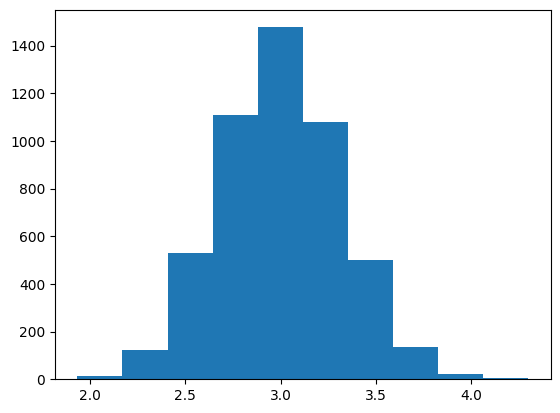

In [ ]:
import matplotlib.pyplot as plt
plt.hist(poisson_means)
print(np.std(poisson_means), np.sqrt(1/10))  #just to check

Lastly, we’ll wrap the above process into a function.

In [ ]:
def plot_poisson_means(mean = 3, n = 30, bins = None):
    if bins is None:
        plt.hist([np.mean(rng.poisson(mean, n)) for _ in range(0,5000)])
    else:
        plt.hist([np.mean(rng.poisson(mean, n)) for _ in range(0,5000)], bins = bins)

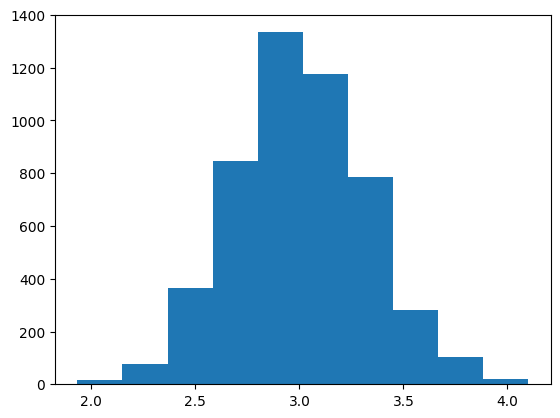

In [ ]:
plot_poisson_means()

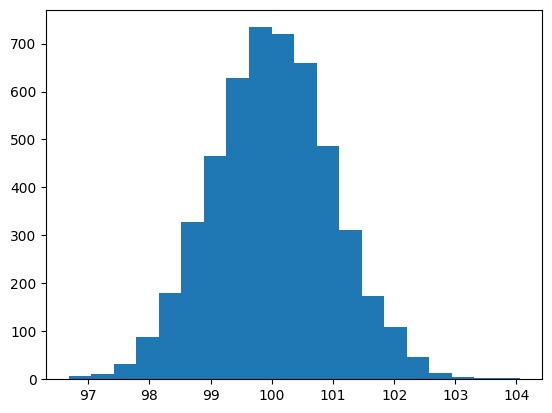

In [ ]:
plot_poisson_means(mean = 100, n = 100, bins = 20)

## Part 2 - Dictionary Practice

In this part, we'll count the number of words in a book using a for loop and a dictionary.  Use the code below to read in the book as a string.  Remember you'll need to place the `.txt` file somewhere python can find it.

In [ ]:
#read in string
import urllib.request
url = "https://www4.stat.ncsu.edu/~online/datasets/charles-dickens-oliver-twist.txt"
urllib.request.urlretrieve(url, 'charles-dickens-oliver-twist.txt')
with open('charles-dickens-oliver-twist.txt', 'r') as f:
    lines = f.read()

In [ ]:
print(lines[:1000])
print(lines[(len(lines)-1000):])

﻿The Project Gutenberg EBook of Oliver Twist, by Charles Dickens

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net


Title: Oliver Twist

Author: Charles Dickens

Posting Date: October 10, 2008 [EBook #730]
Release Date: November, 1996

Language: English


*** START OF THIS PROJECT GUTENBERG EBOOK OLIVER TWIST ***




Produced by Peggy Gaugy and Leigh Little.  HTML version by Al Haines.









OLIVER TWIST

OR

THE PARISH BOY'S PROGRESS


BY

CHARLES DICKENS




CONTENTS

       I  TREATS OF THE PLACE WHERE OLIVER TWIST WAS BORN AND OF THE
          CIRCUMSTANCES ATTENDING HIS BIRTH
      II  TREATS OF OLIVER TWIST'S GROWTH, EDUCATION, AND BOARD
     III  RELATES HOW OLIVER TWIST WAS VERY NEAR GETTING A PLACE WHICH
          WOULD NOT HAVE BEEN A SINECURE
      IV  OLIVER, BEING OFFERED 

Remove everything up to “CHAPTER I” (but leave “CHAPTER I” in the resulting text) and remove everything that isn’t part of the actual book at the end (“End of the Project Gutenberg EBook”).


In [ ]:
#get indices for the first and last bits
first_bit = lines.find("CHAPTER I")
last_bit = lines.find("End of the Project Gutenberg EBook")
mylines = lines[first_bit:last_bit]
#check that it worked correctly by printing out the first 250 and last 250 characters
print(mylines[:250], "\n\n", mylines[-250:])

CHAPTER I

TREATS OF THE PLACE WHERE OLIVER TWIST WAS BORN AND OF THE
CIRCUMSTANCES ATTENDING HIS BIRTH

Among other public buildings in a certain town, which for many reasons
it will be prudent to refrain from mentioning, and to which I will
assign  

 d by the love--the love beyond the
grave--of those whom they knew in life, I believe that the shade of
Agnes sometimes hovers round that solemn nook. I believe it none the
less because that nook is in a Church, and she was weak and erring.













Our goal is to iterate through the words in the book and count the number of times each word occurs. We can use a dictionary to store this type of data! For instance, you’ll end up with a key of “the” with a corresponding value being the number of times “the” occurred.

Some hints:
- Replace all the \n values with spaces as we did previously
- Split the string by spaces and save that resulting list
- Initialize a dictionary to save your words (keys) and counts in (values)
- Import the string module as you’ll need some things from that
-  Use a for loop, iterating over the list elements. When iterating:
  + If you get a space, ignore that iteration of the loop (that is move to the next iteration)
  + Convert each 'word' to lower case
  + We'll need to remove any punctuation (for instance, "end." would need the '.' removed).
    * The object `string.punctuation` has a list of punctuation marks
    * You can write a nested for loop that iterates over the values in `string.punctuation`.  If the punctuation value exists in the 'word' then you can use the `.replace()` method to replace it with an empty string "".  This loop should remove any punctuation!  (Note: this will make words like didn't into didnt, that's fine - ignore that as it will still count appropriately for the most part.)
    + Now the 'word' is processed and we are ready to count.  Use `if`/`else` logic to check if the the word already exists in the dictionary.  If it does, add one to the associated value.  If not, add that key to the dictionary with a value of 1.

In [ ]:
#import string so we can get punctuation
import string

word_count_dictionary = {}
lines_short = mylines.replace("\n", " ")
book = lines_short.split(" ")
# now loop through the elements
for word in book:
    #if it is a space move on
    if not word:
        continue
    #lowercase everything to make it match up
    word = word.lower()
    #need to remove any punctionation, ., ', !, ?, etc. (this will mess up didn't etc. but let's ignore that)
    for symbol in string.punctuation:
        word = word.replace(symbol, "")
    #now add to the dictionary
    if word in word_count_dictionary:
        word_count_dictionary[word] += 1
    else:
        word_count_dictionary[word] = 1

We want to print out the 40 most prevalent words and how prevalent they were (i.e. the 40 most
prevalent key/value pairs).

In [ ]:
prevalent = sorted(word_count_dictionary, key = word_count_dictionary.get, reverse = True)
prevalent[:40]

['the',
 'and',
 'to',
 'of',
 'a',
 'he',
 'in',
 'his',
 'that',
 'was',
 'it',
 'i',
 'you',
 'with',
 'as',
 'said',
 'had',
 'for',
 'mr',
 'him',
 'at',
 'on',
 'which',
 'this',
 'her',
 'not',
 'be',
 'by',
 'have',
 'oliver',
 'but',
 'is',
 'they',
 'from',
 'all',
 'if',
 'me',
 'so',
 'no',
 'were']

In [ ]:
for i in prevalent[:40]:
    print(i, ": ", word_count_dictionary.get(i))

the :  9558
and :  5322
to :  3850
of :  3829
a :  3696
he :  2389
in :  2362
his :  2343
that :  1827
was :  1783
it :  1705
i :  1625
you :  1602
with :  1562
as :  1313
said :  1230
had :  1223
for :  1140
mr :  1070
him :  1057
at :  986
on :  931
which :  870
this :  795
her :  781
not :  775
be :  768
by :  766
have :  757
oliver :  746
but :  720
is :  713
they :  675
from :  630
all :  603
if :  593
me :  588
so :  579
no :  578
were :  557


Remove stop words.

In [ ]:
stop_words = ["the", "and", "to", "of", "a", "in", "that", "with", "for", "at", "on"]
for stop in stop_words:
  if stop in word_count_dictionary:
    del word_count_dictionary[stop]

prevalent = sorted(word_count_dictionary, key = word_count_dictionary.get, reverse = True)
for i in prevalent[:40]:
    print(i, ": ", word_count_dictionary.get(i))

he :  2389
his :  2343
was :  1783
it :  1705
i :  1625
you :  1602
as :  1313
said :  1230
had :  1223
mr :  1070
him :  1057
which :  870
this :  795
her :  781
not :  775
be :  768
by :  766
have :  757
oliver :  746
but :  720
is :  713
they :  675
from :  630
all :  603
if :  593
me :  588
so :  579
no :  578
were :  557
she :  550
who :  511
my :  506
there :  497
or :  496
when :  490
up :  488
very :  485
what :  478
upon :  477
replied :  464
